In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet



In [2]:
file_path = 'used-car-dataset.csv'  
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
pd.DataFrame(data.nunique()).T

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,6019,1876,11,22,3093,5,2,4,442,146,372,9,540,1373


In [6]:
for column in data[['Location',"Fuel_Type","Transmission","Owner_Type","Seats"]]:
    print(f"Unique value Of {column}:")
    dd=pd.DataFrame(data[column].value_counts(dropna=False)).T
    display(dd)
    print("\n")


Unique value Of Location:


Location,Mumbai,Hyderabad,Kochi,Coimbatore,Pune,Delhi,Kolkata,Chennai,Jaipur,Bangalore,Ahmedabad
count,790,742,651,636,622,554,535,494,413,358,224




Unique value Of Fuel_Type:


Fuel_Type,Diesel,Petrol,CNG,LPG,Electric
count,3205,2746,56,10,2




Unique value Of Transmission:


Transmission,Manual,Automatic
count,4299,1720




Unique value Of Owner_Type:


Owner_Type,First,Second,Third,Fourth & Above
count,4929,968,113,9




Unique value Of Seats:


Seats,5.0,7.0,8.0,4.0,NaN,6.0,2.0,10.0,9.0,0.0
count,5014,674,134,99,42,31,16,5,3,1


In [7]:
pd.set_option('display.max_columns', None)
pd.DataFrame(data["Name"].str.split().str[0].value_counts(dropna=False)).T


Name,Maruti,Hyundai,Honda,Toyota,Mercedes-Benz,Volkswagen,Ford,Mahindra,BMW,Audi,Tata,Skoda,Renault,Chevrolet,Nissan,Land,Jaguar,Fiat,Mitsubishi,Mini,Volvo,Porsche,Jeep,Datsun,Force,ISUZU,Smart,Ambassador,Isuzu,Bentley,Lamborghini
count,1211,1107,608,411,318,315,300,272,267,236,186,173,145,121,91,60,40,28,27,26,21,18,15,13,3,2,1,1,1,1,1


In [8]:
for column in data[['Mileage',"Engine","Power"]]:
    print(f"Unique value Of {column}:")
    dd=pd.DataFrame(data[column].str.extract(r'([a-zA-Z/]+)').value_counts(dropna=False)).T
    display(dd)
    print("\n")

Unique value Of Mileage:


,kmpl,km/kg,NaN
count,5951,66,2




Unique value Of Engine:


,CC,NaN
count,5983,36




Unique value Of Power:


,bhp,null,NaN
count,5876,107,36


In [9]:
data[data["Mileage"].isna()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [10]:
def convert_value_to_kmpl(value):

    cng_density = 0.714 
    if isinstance(value, str) and 'km/kg' in value:
        return float(value.replace(' km/kg', '')) / cng_density
    elif isinstance(value, str) and 'kmpl' in value:
        return float(value.replace(' kmpl', ''))
    return value


def convert_mileage_to_kmpl(df):
    df['Mileage'] = df['Mileage'].apply(convert_value_to_kmpl).round()
    df.loc[df['Fuel_Type'] == 'Electric', 'Mileage'] = 0
    return df



In [11]:
def convert_to_numeric(df):

    columns = ['Power', 'Engine']
    
    for column in columns:
        df[column] = df[column].fillna('').astype(str)  
        df[column] = df[column].str.extract(r'(\d+\.?\d*)') 
        df[column] = pd.to_numeric(df[column], errors='coerce').round()  
    return df


In [12]:
def feature_engineering(df):
    df['Car_Age'] = 2024 - df['Year']
    
    df['Brand'] = df['Name'].str.split().str[0]
    small_brands = df['Brand'].value_counts()[df['Brand'].value_counts() < 20].index
    df['Brand'] = df['Brand'].replace(small_brands, 'Other_Brands')

    df['Fuel_Type'] = df['Fuel_Type'].replace(['Electric', 'LPG', 'CNG'] ,'Other Fuel')

    df = df.drop(columns=['Unnamed: 0','Name',"Year","Seats", "Location",'New_Price'], errors='ignore')
    return df


In [13]:
data_cleaned= convert_mileage_to_kmpl(data.copy())
data_cleaned=convert_to_numeric(data_cleaned)
data_cleaned=feature_engineering(data_cleaned)
data_cleaned.head()


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Car_Age,Brand
0,72000,Other Fuel,Manual,First,37.0,998.0,58.0,1.75,14,Maruti
1,41000,Diesel,Manual,First,20.0,1582.0,126.0,12.50,9,Hyundai
2,46000,Petrol,Manual,First,18.0,1199.0,89.0,4.50,13,Honda
3,87000,Diesel,Manual,First,21.0,1248.0,89.0,6.00,12,Maruti
4,40670,Diesel,Automatic,Second,15.0,1968.0,141.0,17.74,11,Audi


In [14]:
data_cleaned.isna().sum()

Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Price                  0
Car_Age                0
Brand                  0
dtype: int64

In [15]:
data_cleaned.describe()

,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
count,6.019000e+03,6019.000000,5983.000000,5876.000000,6019.000000,6019.000000
mean,5.873838e+04,18.246885,1621.276450,113.254425,9.479468,10.641801
std,9.126884e+04,4.876425,601.355233,53.861959,11.187917,3.269742
min,1.710000e+02,0.000000,72.000000,34.000000,0.440000,5.000000
25%,3.400000e+04,15.000000,1198.000000,75.000000,3.500000,8.000000
50%,5.300000e+04,18.000000,1493.000000,98.000000,5.640000,10.000000
75%,7.300000e+04,21.000000,1984.000000,138.000000,9.950000,13.000000
max,6.500000e+06,47.000000,5998.000000,560.000000,160.000000,26.000000


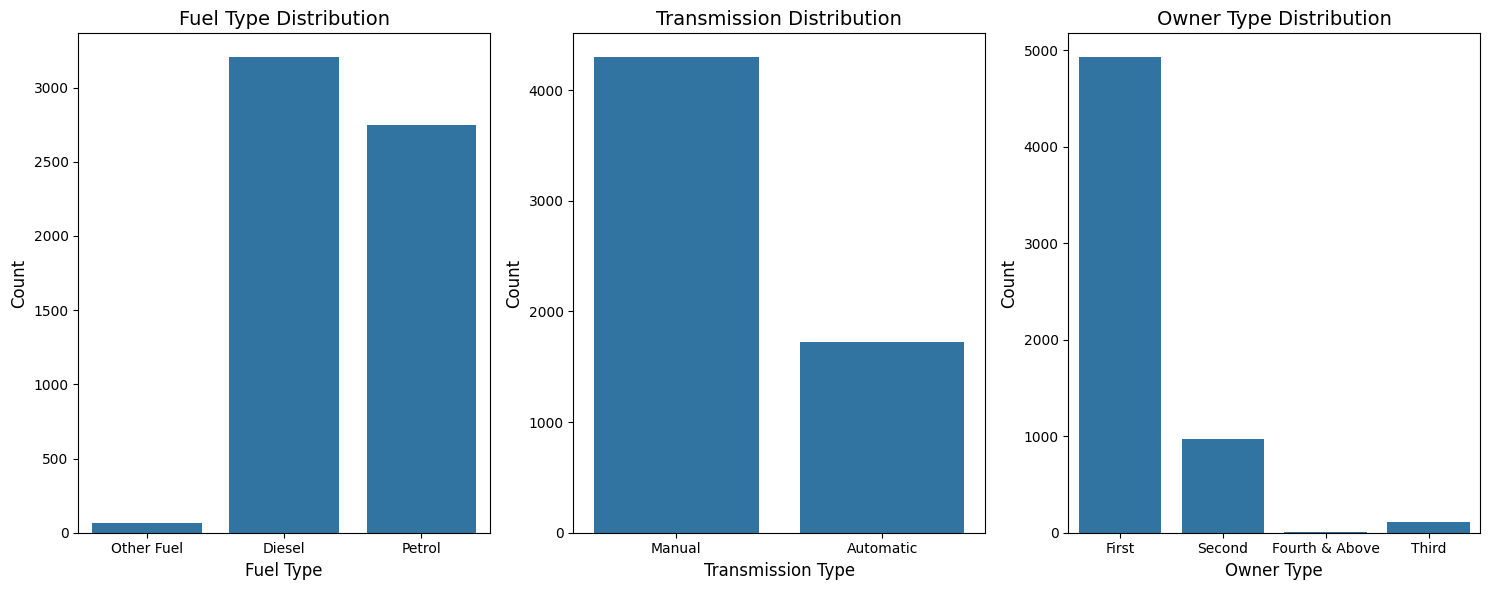

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))  


# Fuel Type Distribution
sns.countplot(x='Fuel_Type', data=data_cleaned, ax=axes[0])
axes[0].set_title('Fuel Type Distribution', fontsize=14)
axes[0].set_xlabel('Fuel Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Transmission Distribution
sns.countplot(x='Transmission', data=data_cleaned, ax=axes[1])
axes[1].set_title('Transmission Distribution', fontsize=14)
axes[1].set_xlabel('Transmission Type', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# Owner Type Distribution
sns.countplot(x='Owner_Type', data=data_cleaned, ax=axes[2])
axes[2].set_title('Owner Type Distribution', fontsize=14)
axes[2].set_xlabel('Owner Type', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
 


plt.tight_layout()
plt.show()

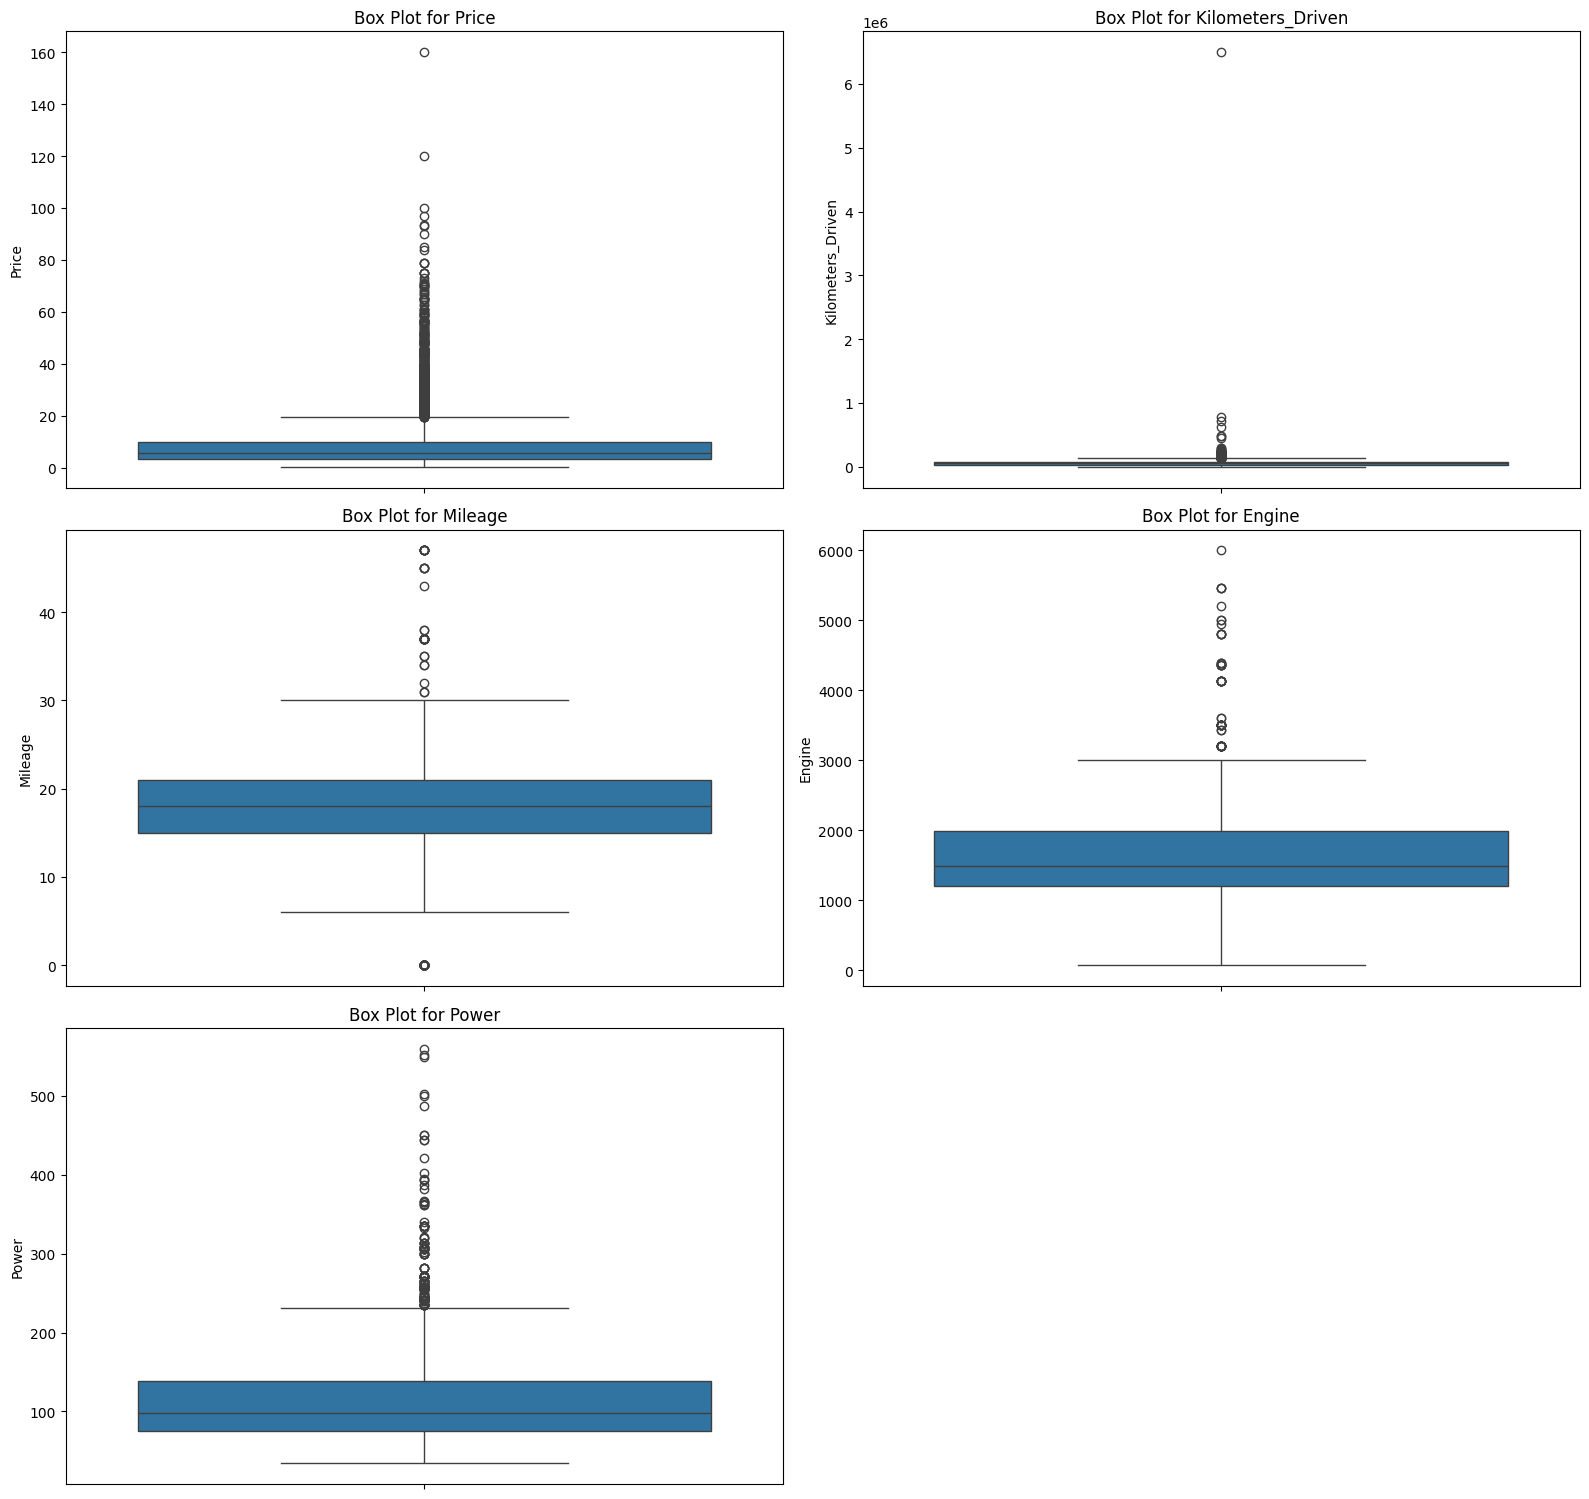

In [17]:
numeric_columns = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']


plt.figure(figsize=(16, 30))


for i, col in enumerate(numeric_columns, 1):
    plt.subplot(6, 2, i)  
    sns.boxplot(data=data_cleaned[col])
    plt.title(f'Box Plot for {col}')
    plt.tight_layout()

plt.show()

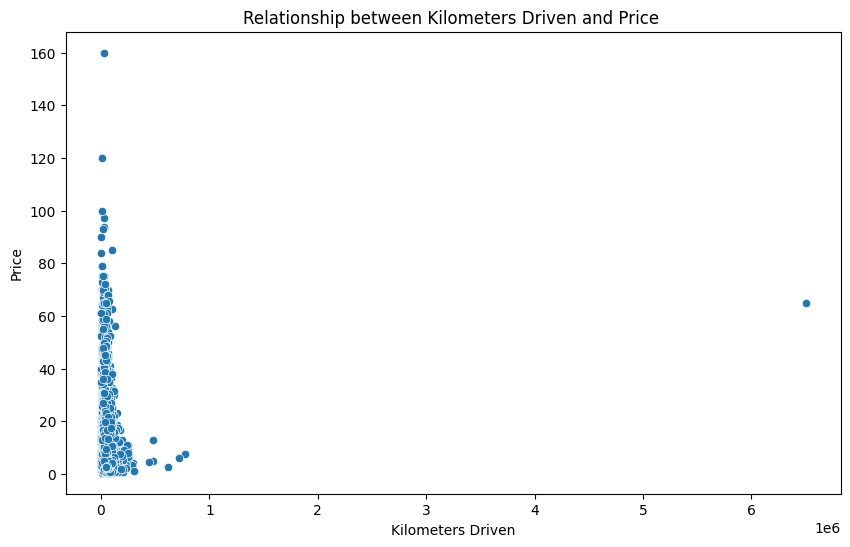

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=data)
plt.title('Relationship between Kilometers Driven and Price ')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

In [19]:
def remove_outliers_iqr(df):
    columns = ["Price", 'Engine', 'Power','Kilometers_Driven']
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5* IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df
    


In [20]:
data_cleaned=remove_outliers_iqr(data_cleaned)

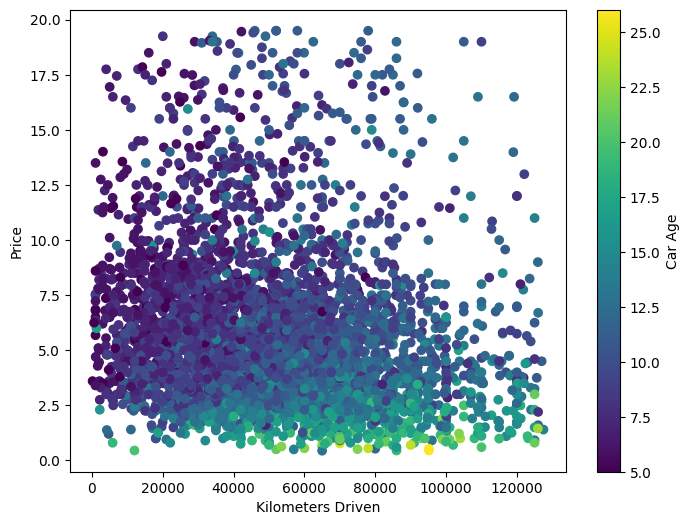

In [21]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_cleaned['Kilometers_Driven'], data_cleaned['Price'], c=data_cleaned['Car_Age'], cmap='viridis')

plt.colorbar(scatter, label='Car Age')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

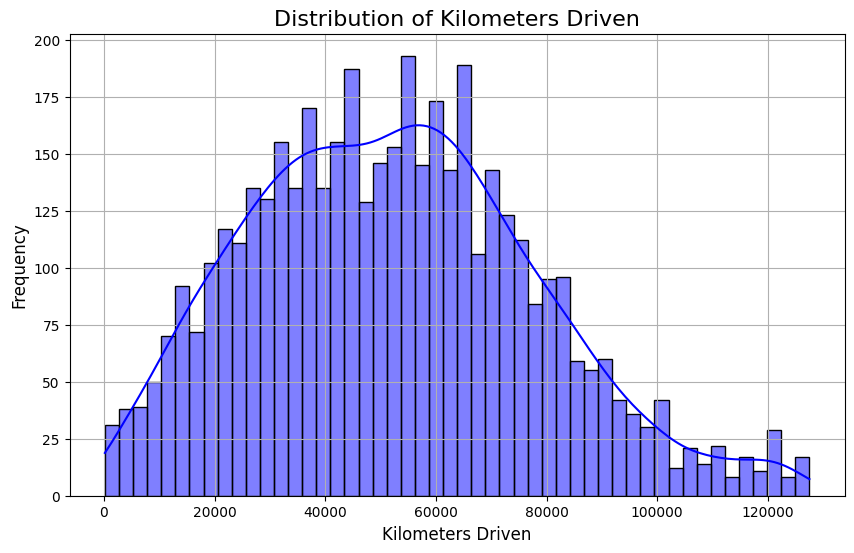

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Kilometers_Driven'], bins=50, kde=True, color='b')  
plt.title('Distribution of Kilometers Driven', fontsize=16)
plt.xlabel('Kilometers Driven', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

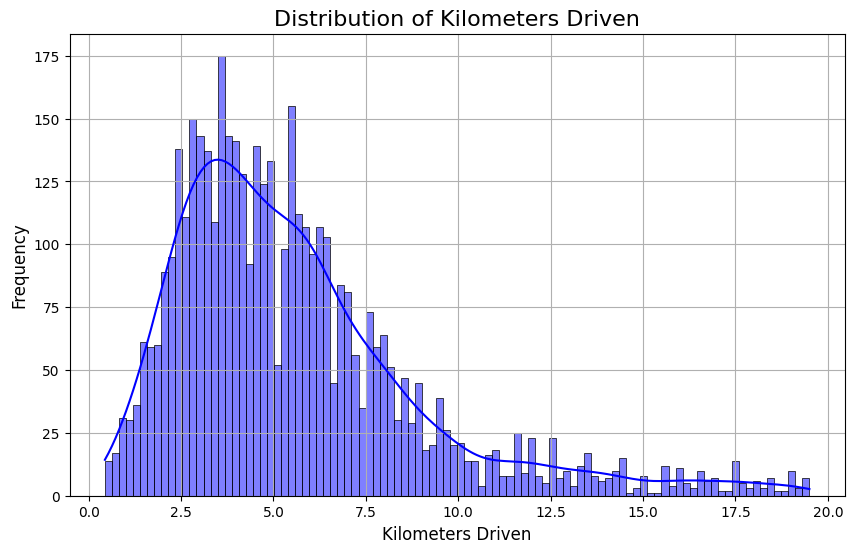

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Price'], bins=100, kde=True, color='b')  
plt.title('Distribution of Kilometers Driven', fontsize=16)
plt.xlabel('Kilometers Driven', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

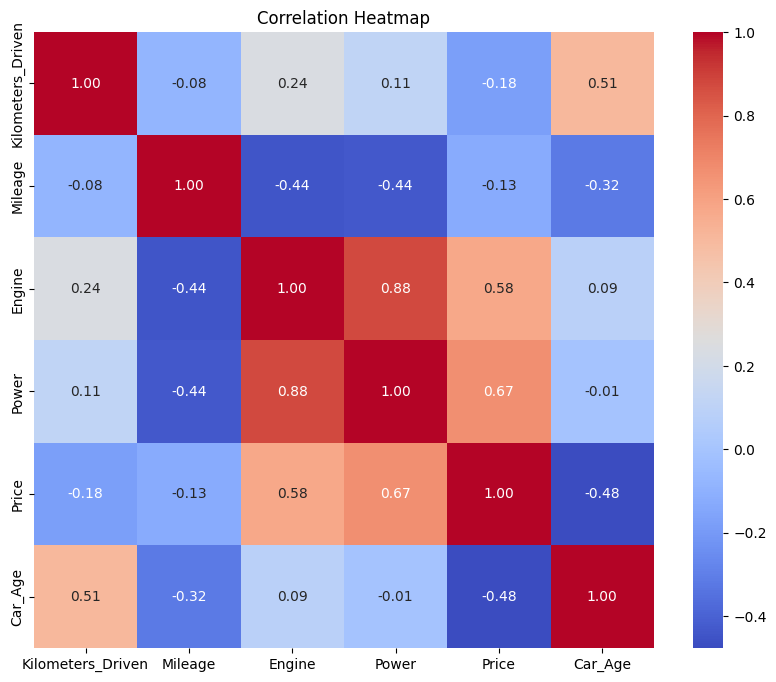

In [24]:
numeric_data = data_cleaned.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
numeric_features=["Car_Age","Mileage","Engine","Power","Kilometers_Driven"]
categorical_features=["Fuel_Type","Transmission","Owner_Type","Brand"]

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
            ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  
            ('scaler', StandardScaler())  
        ]), numeric_features),
            ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_features)  
    ],remainder='passthrough'
    )





In [27]:
pipeline = imbpipeline(steps=[
    ('split_mileage', FunctionTransformer(convert_mileage_to_kmpl)),  
    ('convert_to_numeric', FunctionTransformer(convert_to_numeric)),              
    ('feature_engineering', FunctionTransformer(feature_engineering)),             
    ('remove_outliers_iqr', FunctionTransformer(remove_outliers_iqr)),            
    ('preprocessor', preprocessor)                               
          
])

Data=pipeline.fit_transform(data.copy())
Data = pd.DataFrame(Data, columns=preprocessor.get_feature_names_out())
X = Data.drop(columns=['remainder__Price'])
Y = Data['remainder__Price'] 


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [28]:
model=RandomForestRegressor(random_state=42,n_estimators=400 )
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error: 0.8432524799948765
Mean Squared Error (MSE): 1.7371737064352901
Root Mean Squared Error (RMSE): 1.3180188566311524
R-squared (R²): 0.8554608855032738


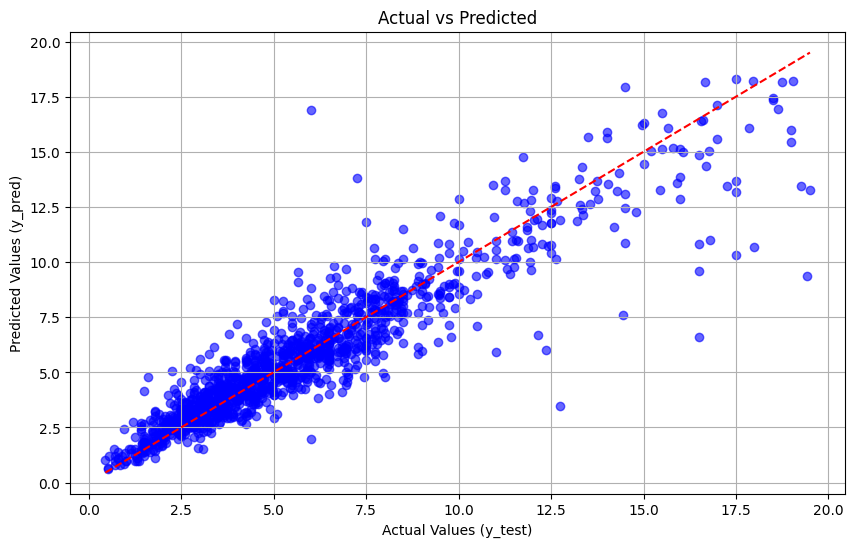

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid()
plt.show()

In [30]:
from sklearn.neural_network import MLPRegressor

modelNN = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)

modelNN.fit(X_train, y_train)

y_pred_NN=modelNN.predict(X_test)
mae_NN = mean_absolute_error(y_test, y_pred_NN)
print(f'Mean Absolute Error: {mae_NN}')

mse_NN = mean_squared_error(y_test, y_pred_NN)
print(f"Mean Squared Error (MSE): {mse_NN}")

rmse_NN = np.sqrt(mse_NN)
print(f"Root Mean Squared Error (RMSE): {rmse_NN}")

r2_NN = r2_score(y_test, y_pred_NN)
print(f"R-squared (R²): {r2_NN}")

Mean Absolute Error: 0.8267143182919046
Mean Squared Error (MSE): 1.5078484837641444
Root Mean Squared Error (RMSE): 1.2279448211398363
R-squared (R²): 0.8745415706954698


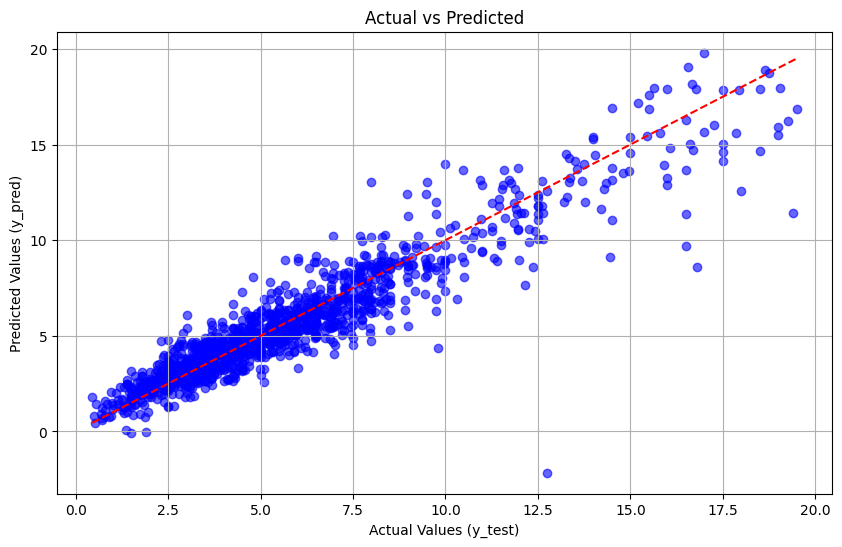

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_NN, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid()
plt.show()

In [32]:
from sklearn.svm import SVR
model_SVR = SVR(kernel='linear')

model_SVR.fit(X_train, y_train)
y_pred_SVR=modelNN.predict(X_test)

mae_SVR = mean_absolute_error(y_test, y_pred_SVR)
print(f"Mean Absolute Error (MAE): {mae_SVR}")

mse_SVR = mean_squared_error(y_test, y_pred_SVR)
print(f"Mean Squared Error (MSE): {mse_SVR}")

rmse_SVR = np.sqrt(mse_SVR)
print(f"Root Mean Squared Error (RMSE): {rmse_SVR}")

r2_SVR = r2_score(y_test, y_pred_SVR)
print(f"R-squared (R²): {r2_NN}")

Mean Absolute Error (MAE): 0.8267143182919046
Mean Squared Error (MSE): 1.5078484837641444
Root Mean Squared Error (RMSE): 1.2279448211398363
R-squared (R²): 0.8745415706954698


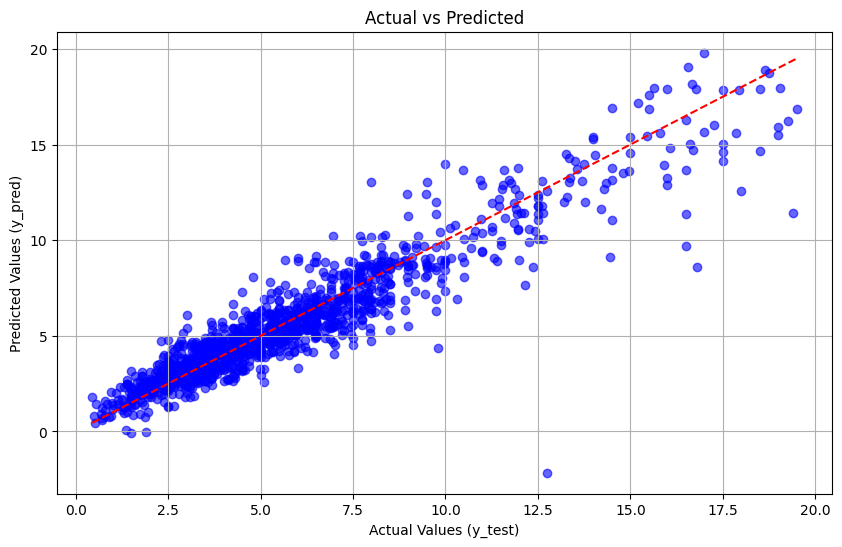

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_SVR, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid()
plt.show()